<a href="https://colab.research.google.com/github/yulbeom/portfolio/blob/main/CH07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7-1 단순회귀

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/auto-mpg.csv', header=None)
display(df.head())  # print말고   display 가 좀 더 이쁘게 나옴

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
print(df['horsepower'].unique()) # horsepower 열의 고유값 확인
print('\n')

[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193. 100. 105. 175. 153. 180. 110.
  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92. 145.
 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.  52.
  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152. 102.
 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138. 135.
 142.  77.  62. 132.  84.  64.  74. 116.  82.]




In [ ]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace=True) # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') # 문자열을 실수형으로 변환

print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [ ]:
# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
display(ndf.head())

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


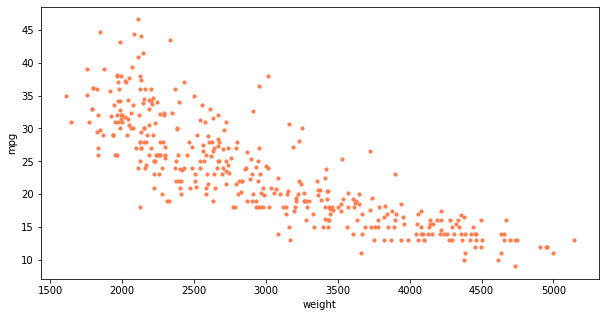

In [ ]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5)) # pandas의 plot임, matplotlib의 plot이 아니다 조심 !!
plt.show()
plt.close()

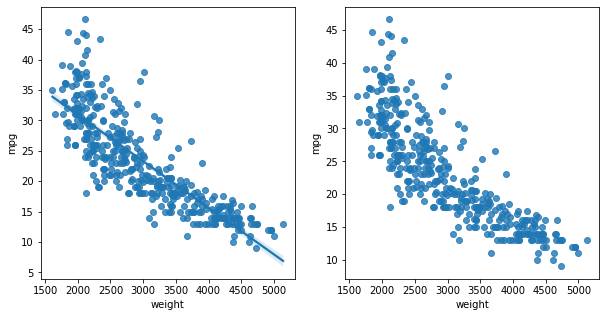

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1) # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False) # 회귀선 미표시
plt.show()
plt.close()

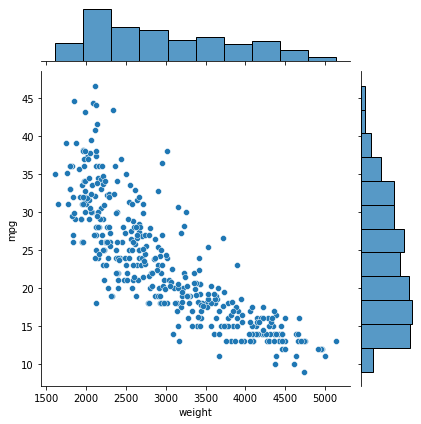

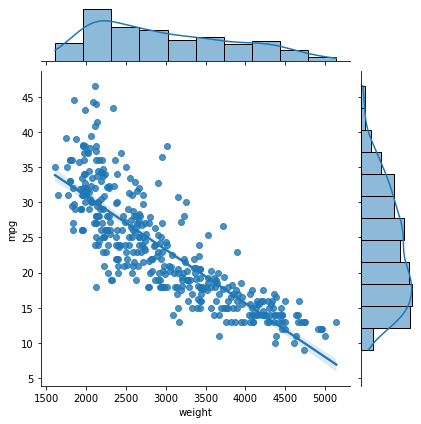

In [ ]:
sns.jointplot(x='weight', y='mpg', data=ndf)   # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시
plt.show()
plt.close()

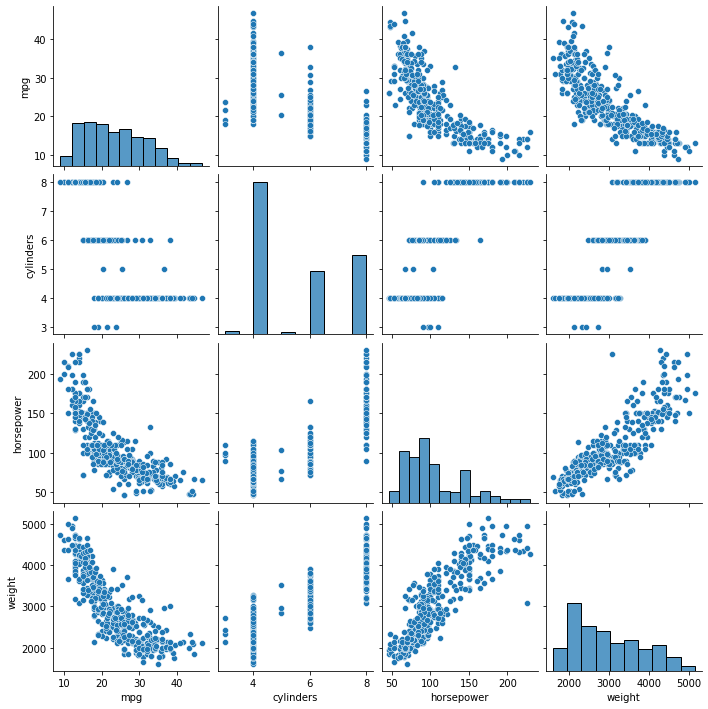

In [ ]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [ ]:
# 속성(변수) 선택
X = ndf[['weight']] # 독립 변수 X  이차원배열 자세한건 scikitlearn 사이트에 
y = ndf['mpg']  # 종속 변수 y

In [ ]:
# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299322


In [ ]:
print('기울기 a: ', lr.coef_)
print('\n')

print('y절편 b: ', lr.intercept_)

기울기 a:  [-0.00775343]


y절편 b:  46.7103662572801


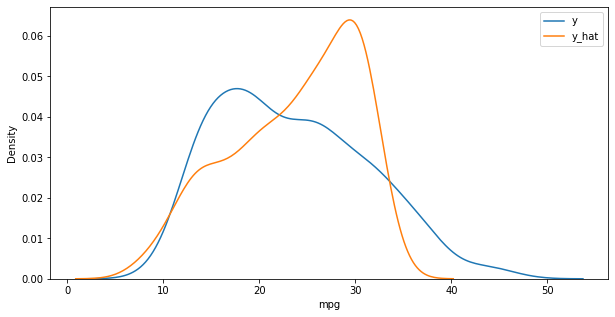

In [ ]:
y_hat = lr.predict(X)
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()  # 범례 추가 
plt.show()

# 7-2 Polynominal regression

In [ ]:
print(X_train.shape, X_test.shape)

(274, 1) (118, 1)


In [ ]:
from sklearn.linear_model import LinearRegression # 선형회귀분석 
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환( 위에서 했지만 다시 해보면서 연습겸...)

poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변형 (a+b)^2 = a^2 + 2*a*b + b^2 과 원리가 비슷

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)
print(poly.get_feature_names()) # 1 -> 절편의 계수

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)
['1', 'x0', 'x0^2']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# train data를 가지고 모델 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975481


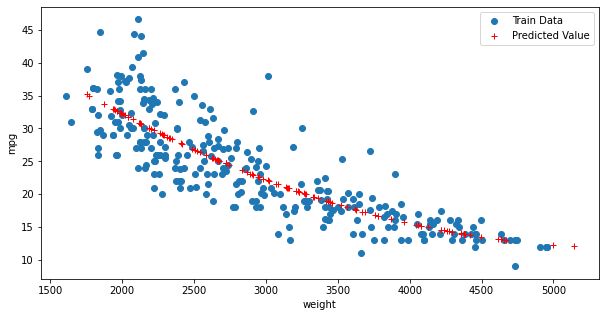

In [ ]:
# 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') 
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

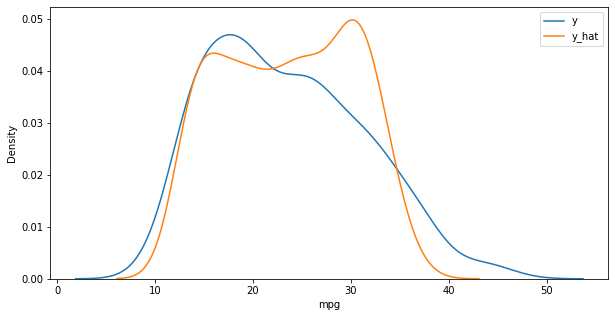

In [ ]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [ ]:
X = ndf[['cylinders', 'horsepower', 'weight']]
y = ndf['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape)

(274, 3) (118, 3)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

print('상수항 b', lr.intercept_)

0.6939048496695599


상수항 b 46.414351269634025


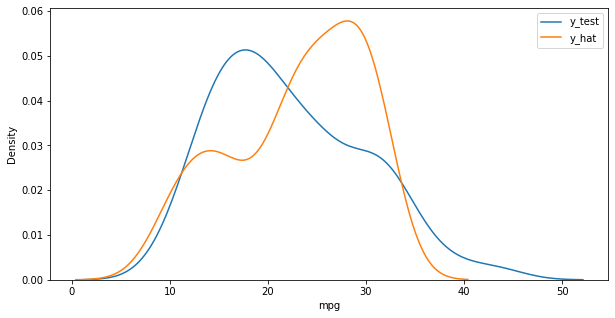

In [ ]:
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

print(df.head())
print('\n')

pd.set_option('display.max_columns', 15)
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
rdf = df.drop(['deck', 'embark_town'], axis=1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [ ]:
rdf = rdf.dropna(subset=['age'],how = 'any' , axis=0)
print(len(rdf))

714


In [ ]:
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

S


          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000

In [ ]:
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [ ]:
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1


In [ ]:
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
y = ndf['survived']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


# SVM

In [ ]:
from sklearn import svm

svm_model = svm.SVC(kernel='rbf')

svm_model.fit(X_train, y_train)

y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [ ]:
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)
print('\n')

svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



# 결정 트리

In [ ]:
import pandas as pd
import numpy as np

uci_path = 'https://archive.ics.uci.edu/m1/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

HTTPError: ignored

In [ ]:
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

pd.set_option('display.max_columns', 15)

print(df.head())
print('\n')

print(df.head())
print('\n')

print(df.info())
print('\n')

print(df.describe())

ValueError: ignored

In [ ]:
print(df['bare_nuclei'].unique())
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())

KeyError: ignored

In [ ]:
X = df[]

# 군집(Clustering)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/m1/machine-learning-databases/\00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

print(df.head())
print('\n')

print(df.info())
print('\n')

print(df.describe())

In [ ]:
X = df.iloc[:, :]
print(X[:5])
print('\n')

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(X)

print(x[:5])

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  




NameError: ignored

In [ ]:
from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(x)

cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

df['Cluster'] = cluster_label
print(df.head())

In [ ]:
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1',
        colorbar=True, figsize=(10, 10))
plt.show()
# plt.close() -> 안해도 됨

In [ ]:
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
         colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1',
         colorbar=True, figsize=(10, 10))
plt.show()
# plt.close() -> 안해도 됨 